# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

## [Task 1] Create a Class of Linear Regression from Scratch

<br />

I will create a class of linear regression and incorporate it to the pipeline of regressions on the "sprint2" directory.

### Hypothesis Function

<br />

I implement the following hypothesis function of linear regression.

$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_j x_j + \theta_n x_n \ \ \ (x_0=1)
$$

$x$: feature vector

$\theta$: parameter vector

$n$: the number of features

$x_j$: jth feature vector

$\theta_j$: jth parameter(weight) vector

I will implement the hypothesis function that can apply to any $n$, the number of features.

<br />

In addition, the following equation is the vector format.

$$
h_\theta(x) = \theta^T x
$$

### Objective Function

<br />


I will implement the following objective function of linear regression. This is the MSE, mean square error divided by 2 to use the steepest descent method easily.

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

$m$: the number of data input

$h_\theta()$: hypothesis function

$x^{(i)}$: feature vector of ith sample

$y^{(i)}$: correct values of ith sample

### Steepest Descent Method

<br />

I will fit datasets by steepest descent method. The following equation is to update the jth parameter.

$$
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

$\alpha$: learning rate

$i$: index of a sample

$j$: index of a feature

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Create a class of linear regression from scratch

class ScratchLinearRegression():
    """
    Implementation of linear regression from scratch
    
    Parameters
    ----------
    num_iter: int
        The number of iteration
    
    lr: float
        Learning rate
    
    no_bias: bool
        True if not input the bias term
    
    verbose: bool
        True if output the learning process
    
    
    Attributes
    ----------
    self.coef_: ndarray whose shape is (n_features,)
        parameters
    
    self.loss: ndarray whose shape is (self.iter,)
        records of loss on train dataset
    
    self.val_loss: ndarray whose shape is (self.iter,)
        records of loss on validation dataset
    """
    
    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attribute
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        
        # Prepare arrays for recording loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit linear regression. In a case of inputting validation dataset, return loss and accuracy of 
        the data per iteration.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        y: ndarray whose shape is (n_samples,)
            Correct values of train dataset
        
        X_val: ndarray whose shape is (n_samples,n_features)
            Features of validation dataset
        
        y_val: ndarray whose shape is (n_samples,)
            Correct values of validation dataset
        """
        
        ###print("fit-1, X=",X.shape)   # (1168,2)
        ###print("fit-2, y=",y.shape)   # (1168,)
        ###print("fit-101, X_val=",X_val.shape)   # (292,2)
        ###print("fit-102, y_val=",y_val.shape)   # (292,)
        
        # Change the vectors to a matrix
        y = y.reshape(len(y), 1)
        if y_val is not None:
            y_val = y_val.reshape(len(y_val), 1)
        
        # Add a bias if self.bias is True
        if self.bias == True:
            # Create arrays of biases
            X_bias = np.array([1 for _ in range(X.shape[1])])
            y_bias = np.array([1 for _ in range(y.shape[1])])
            ###print("fit-3, X_bias=",X_bias.shape)   # (1168,)
            ###print("fit-4, y_bias=",y_bias.shape)   # (1168,)
            # Add the biases
            X = np.vstack((X_bias, X))
            y = np.vstack((y_bias, y))
        
        # Transform dataframes to move their features to rows
        X = X.T
        y = y.T
        if (X_val is not None) and (y_val is not None):
            X_val = X_val.T
            y_val = y_val.T
        
        ###print("fit-5, X=",X.shape)   # (2,1168)
        ###print("fit-6, y=",y.shape)   # (1,1168)
        ###if (X_val is not None) and (y_val is not None):
            ###print("fit-103, X_val=",X_val.shape)   # (2,292)
            ###print("fit-104, y_val=",y_val.shape)   # (1,292)
        
        # Set a hypothesis parameter randomly and transform it
        self.coef_ = np.random.randn(X.shape[0])
        self.coef_ = self.coef_.reshape(len(self.coef_),1)
        ###print("fit-7, self.coef_=",self.coef_.shape)   # (2,1)
        
        # Update the theta and get loss of train dataset
        for i in range(self.iter):
            # Update the parameter
            self.coef_ = self._gradient_descent(X, y)
            ###print("fit-8, self.coef_=",self.coef_.shape)   # (2,1)
            # Compute the mean square mean
            mse = self._compute_cost(X, y)
            ###print("fit-9, mse=",mse.shape)   # ()
            # Record the errors
            self.loss[i] = mse
            # Return the loss if verbose is True
            if self.verbose:
                print(self.loss[i])
            
            # Get loss of validation datasets
            if (X_val is not None) and (y_val is not None):
                # Get the mean square error
                val_mse = self._compute_cost(X_val, y_val)
                # Record the errors
                self.val_loss[i] = val_mse
                # Return the loss if verbose is True
                if self.verbose:
                    print(self.val_loss[i])
    
    
    def predict(self, X):
        """
        Predict by using linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Samples
        
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by using linear regression
        """
        
        if self.bias == True:
            X_bias = np.array([1 for _ in range(X.shape[1])])
            X = np.vstack((X_bias, X))
        
        ###print("predict-1, self.coef_=",self.coef_.shape)
        ###print("predict-2, X=",X.shape)
        
        # Predict train dataset
        y_pred = np.dot(self.coef_.T, X.T)   # (1,2) * (2,293)
        
        return y_pred
    
    
    # Create a definition of hypothesis function of lunear regression
    def _linear_hypothesis(self, X):
        """
        Return hypothesis function of linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Train dataset
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by hypothesis function of linear regression
        """
        
        # Compute the hypothesis function
        y_pred = np.dot(self.coef_.T, X)   # (1,2) * (2,1168)
        ###print("_linear_hypothesis-1, y_pred=",y_pred.shape)   # (1,1168)
         
        return y_pred
    
    
    # Create a definition to compute the mean square error
    def _compute_cost(self, X, y):
        """
        Compute the mean square error. Import the "MSE" definition.

        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset

        y: ndarray whose shape is (n_samples,1)
            correct value


        Returns
        ----------
        ndarray whose shape is (1,)
            mean square error
        """

        y_pred = self._linear_hypothesis(X)
    
        return self.MSE(y_pred, y)
    
    
    # Create a definition of the mean square error
    def MSE(self, y_pred, y):
        """
        Return the mean square error
        
        Parameters
        ----------
        y_pred: ndarray whose shape is (n_samples,)
            predited value
        
        y: ndarray whose shape is (n_samples,)
            correct value
        
        
        Returns
        ----------
        mse: numpy.float
            mean square error
        """
        
        # Compute an error
        error = y_pred - y
        ###print("MSE-1, error=",error.shape)   # (1,1168)
        
        # Sum errors
        sum_errors = np.sum(error**2)
        
        # Return the mean square error devided by 2
        return sum_errors / (2*y.shape[1])
    
    
    # Create a definition to fit datasets by steepest descent method
    def _gradient_descent(self, X, y):
        """
        Fit datasets by steepest descent method
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset
        
        y: ndarray whose shape is (n_samples,1)
            correct value
        
        
        Returns
        ----------
        ndarray whose shape is (1,)
            parameter(weight)
        """
        
        # Predict train dataset
        y_pred = np.dot(self.coef_.T, X)   # (1,2) * (2,1168)
        ###print("_gradient_decsent-1, y_pred=",y_pred.shape)  # (1,1168)
        
        ###print("_gradient_decsent-1, y=",y.shape)   # (1,1168)
        
        # Compute the error and the mean square error
        error = y_pred - y   # (1,1168)
        ###print("_gradient_decsent-2, error=",error.shape)   # (1,1168)
        
        # Compute the gradient
        grad = np.dot(X, error.T)   # (2,1168) * (1168,1)
        ###print("_gradient_decsent-3, grad=",grad.shape)   # (2,1)
        
        # Update the parameter
        return self.coef_ - self.lr*grad/y.shape[1]
    
    
    # Plot learning records
    def plot_learning_record(self):
        plt.plot(self.loss, label="loss")
        plt.plot(self.val_loss, label="val_loss")
        
        plt.title("Learning Records")
        plt.xlabel("Number of Iterrations")
        plt.ylabel("Loss")
        plt.grid(True)
        
        plt.legend()
        plt.show()

#### Validate the Class

<br />

I am going to validate the class by using the "House Prices: Advanced Regression Techniques" datasets on Kaggle.

In [3]:
# Prepare a dataset for the validation

# Import the dataset
train = pd.read_csv('"House Prices- Advanced Regression Techniques".train.csv')
test = pd.read_csv('"House Prices- Advanced Regression Techniques".test.csv')

# Split the datasets into explanatory and objective variables
X = train.loc[:,["GrLivArea", "YearBuilt"]].values
y = train.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Xy = pd.concat([X,y], axis=1)

#df = Xy[Xy.Species!=0]

# create and save a csv file of the dataframe
#df.to_csv('iris_dataset.csv')

In [4]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [5]:
# Initialize the class

slr = ScratchLinearRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True)

In [6]:
slr.fit(std_X_train, y_train, std_X_test, y_test)

19425528099.848007
19826222778.313576
19425081277.810154
19825671174.017696
19424634559.835762
19825119692.572144
19424187945.90055
19824568333.94889
19423741435.980244
19824017098.119904
19423295030.05058
19823465985.05715
19422848728.08728
19822914994.732628
19422402530.066097
19822364127.118324
19421956435.962784
19821813382.186234
19421510445.753086
19821262759.908356
19421064559.41276
19820712260.25671
19420618776.91758
19820161883.2033
19420173098.24331
19819611628.72016
19419727523.365734
19819061496.779312
19419282052.260628
19818511487.3528
19418836684.903778
19817961600.41265
19418391421.270985
19817411835.930923
19417946261.33804
19816862193.879673
19417501205.080753
19816312674.23096
19417056252.474934
19815763276.95685
19416611403.49639
19815214002.029415
19416166658.120956
19814664849.420742
19415722016.324448
19814115819.102913
19415277478.08271
19813566911.048027
19414833043.371574
19813018125.22818
19414388712.166885
19812469461.615482
19413944484.444492
19811920920.18

19220188060.71101
19572103096.85201
19219789056.843464
19571608013.490784
19219390145.883175
19571113040.090324
19218991327.80847
19570618176.62559
19218592602.597694
19570123423.07152
19218193970.22916
19569628779.40307
19217795430.681232
19569134245.5952
19217396983.932243
19568639821.62287
19216998629.96055
19568145507.46106
19216600368.7445
19567651303.084736
19216202200.262463
19567157208.46889
19215804124.492805
19566663223.58851
19215406141.413895
19566169348.418587
19215008251.00411
19565675582.934124
19214610453.241837
19565181927.110123
19214212748.105453
19564688380.921593
19213815135.573357
19564194944.343555
19213417615.62394
19563701617.35104
19213020188.23561
19563208399.919067
19212622853.38677
19562715292.022675
19212225611.055832
19562222293.636898
19211828461.221214
19561729404.736797
19211431403.86134
19561236625.29741
19211034438.95463
19560743955.293797
19210637566.479523
19560251394.701023
19210240786.414455
19559758943.494156
19209844098.73787
19559266601.648277

19065233426.878895
19379416147.07876
19064870500.70085
19378963810.51648
19064507659.01416
19378511574.179947
19064144901.799114
19378059438.04634
19063782229.036003
19377607402.092857
19063419640.70513
19377155466.296696
19063057136.7868
19376703630.635056
19062694717.26133
19376251895.085163
19062332382.109028
19375800259.62422
19061970131.310215
19375348724.229458
19061607964.845215
19374897288.878094
19061245882.69436
19374445953.547367
19060883884.837982
19373994718.214508
19060521971.256416
19373543582.856773
19060160141.93
19373092547.451393
19059798396.839096
19372641611.975628
19059436735.964043
19372190776.40674
19059075159.2852
19371740040.72198
19058713666.78293
19371289404.898632
19058352258.437595
19370838868.91396
19057990934.22957
19370388432.745243
19057629694.13922
19369938096.369778
19057268538.146935
19369487859.764835
19056907466.233097
19369037722.90773
19056546478.378086
19368587685.77574
19056185574.562305
19368137748.346188
19055824754.766144
19367687910.59638


18936224015.182816
19218289729.698082
18935891120.667118
19217873054.813717
18935558303.638103
19217456472.043713
18935225564.077705
19217039981.36712
18934892901.967846
19216623582.763012
18934560317.290474
19216207276.210464
18934227810.027523
19215791061.688545
18933895380.160942
19215374939.176342
18933563027.672672
19214958908.65294
18933230752.544678
19214542970.09742
18932898554.758904
19214127123.488884
18932566434.29732
19213711368.806427
18932234391.141895
19213295706.029163
18931902425.274593
19212880135.136196
18931570536.677383
19212464656.106636
18931238725.332256
19212049268.91961
18930906991.221188
19211633973.55424
18930575334.326168
19211218769.989647
18930243754.629185
19210803658.204975
18929912252.112232
19210388638.179356
18929580826.757313
19209973709.891937
18929249478.54643
19209558873.321865
18928918207.461594
19209144128.448288
18928587013.484814
19208729475.250366
18928255896.598106
19208314913.70727
18927924856.783493
19207900443.79816
18927593894.022995
19

18749496764.446156
18983747836.91337
18749207327.817005
18983382915.4836
18748917958.539925
18983018074.415714
18748628656.599216
18982653313.691475
18748339421.979168
18982288633.29266
18748050254.664085
18981924033.20105
18747761154.63828
18981559513.398422
18747472121.88606
18981195073.866577
18747183156.391727
18980830714.587288
18746894258.13961
18980466435.542366
18746605427.11403
18980102236.713604
18746316663.29931
18979738118.082806
18746027966.67976
18979374079.631783
18745739337.23974
18979010121.34234
18745450774.963566
18978646243.196304
18745162279.83558
18978282445.17549
18744873851.840126
18977918727.261723
18744585490.961555
18977555089.436836
18744297197.18421
18977191531.68266
18744008970.492447
18976828053.981026
18743720810.87062
18976464656.31379
18743432718.30309
18976101338.662785
18743144692.77423
18975738101.009865
18742856734.2684
18975374943.33689
18742568842.76997
18975011865.62571
18742281018.26332
18974648867.858196
18741993260.732826
18974285950.016205
1

18598528354.804695
18792747285.698086
18598274043.973404
18792424348.763096
18598019792.304295
18792101482.67547
18597765599.78356
18791778687.419174
18597511466.397423
18791455962.978172
18597257392.132095
18791133309.336433
18597003376.97379
18790810726.47793
18596749420.908722
18790488214.38663
18596495523.92313
18790165773.046528
18596241686.003227
18789843402.4416
18595987907.135254
18789521102.55584
18595734187.305435
18789198873.373226
18595480526.500008
18788876714.87776
18595226924.70521
18788554627.05344
18594973381.90729
18788232609.884274
18594719898.092495
18787910663.35426
18594466473.247063
18787588787.447407
18594213107.357258
18787266982.147728
18593959800.409325
18786945247.439247
18593706552.38953
18786623583.305973
18593453363.28413
18786301989.73194
18593200233.079395
18785980466.70117
18592947161.761597
18785659014.1977
18592694149.31699
18785337632.20556
18592441195.731865
18785016320.708794
18592188300.992496
18784695079.69144
18591935465.085163
18784373909.1375

18487803185.224937
18651715860.518307
18487574630.277534
18651423814.270607
18487346128.488174
18651131831.883213
18487117679.84447
18650839913.341694
18486889284.334038
18650548058.63163
18486660941.944492
18650256267.738583
18486432652.66345
18649964540.648144
18486204416.47852
18649672877.345882
18485976233.377346
18649381277.817398
18485748103.34754
18649089742.04827
18485520026.37674
18648798270.024094
18485292002.45257
18648506861.73046
18485064031.562668
18648215517.152973
18484836113.69468
18647924236.277233
18484608248.836227
18647633019.08885
18484380436.97497
18647341865.573418
18484152678.098557
18647050775.716564
18483924972.194626
18646759749.5039
18483697319.250835
18646468786.92104
18483469719.25484
18646177887.953606
18483242172.1943
18645887052.587223
18483014678.05687
18645596280.80752
18482787236.830223
18645305572.60014
18482559848.502014
18645014927.950703
18482332513.05993
18644724346.844852
18482105230.491623
18644433829.268234
18481878000.78478
18644143375.2064

18396131913.765606
18534236284.856518
18395924677.735584
18533969887.935574
18395717489.894623
18533703549.08349
18395510350.231483
18533437268.287167
18395303258.734947
18533171045.533516
18395096215.393772
18532904880.80943
18394889220.196754
18532638774.10182
18394682273.132664
18532372725.397614
18394475374.190285
18532106734.68371
18394268523.358395
18531840801.947025
18394061720.625793
18531574927.17449
18393854965.981262
18531309110.353027
18393648259.413593
18531043351.469555
18393441600.911587
18530777650.511013
18393234990.46404
18530512007.464336
18393028428.05975
18530246422.31645
18392821913.68752
18529980895.054295
18392615447.33616
18529715425.664818
18392409028.994473
18529450014.134968
18392202658.65127
18529184660.45168
18391996336.295376
18528919364.601913
18391790061.91559
18528654126.572628
18391583835.50074
18528388946.350765
18391377657.03965
18528123823.923298
18391171526.52114
18527858759.277187
18390965443.934036
18527593752.399395
18390759409.26717
1852732880

18425844268.275043
18311883775.14446
18425601460.380127
18311696127.334873
18425358705.237152
18311508523.149475
18425116002.83424
18311320962.5781
18424873353.1595
18311133445.610577
18424630756.201073
18310945972.236755
18424388211.94708
18310758542.446465
18424145720.385654
18310571156.229565
18423903281.50493
18310383813.575886
18423660895.293045
18310196514.475292
18423418561.73814
18310009258.917625
18423176280.828358
18309822046.892742
18422934052.551846
18309634878.39049
18422691876.896744
18309447753.40074
18422449753.851215
18309260671.91335
18422207683.4034
18309073633.91818
18421965665.541462
18308886639.405098
18421723700.25356
18308699688.363964
18421481787.527847
18308512780.784657
18421239927.352497
18308325916.657043
18420998119.71568
18308139095.971
18420756364.60556
18307952318.71641
18420514662.010307
18307765584.88315
18420273011.918095
18307578894.46109
18420031414.317112
18307392247.440132
18419789869.195534
18307205643.81015
18419548376.54154
18307019083.561043


18234918599.881664
18325707564.307148
18234748842.789837
18325486474.835922
18234579125.153618
18325265433.2304
18234409446.963802
18325044439.479836
18234239808.211205
18324823493.573463
18234070208.886635
18324602595.500534
18233900648.980907
18324381745.2503
18233731128.484844
18324160942.812008
18233561647.389248
18323940188.174915
18233392205.68496
18323719481.328278
18233222803.36278
18323498822.261353
18233053440.413555
18323278210.963398
18232884116.8281
18323057647.423683
18232714832.59724
18322837131.631477
18232545587.711815
18322616663.576046
18232376382.16265
18322396243.246655
18232207215.940594
18322175870.632584
18232038089.03647
18321955545.72311
18231869001.441124
18321735268.507504
18231699953.145397
18321515038.975056
18231530944.140133
18321294857.11505
18231361974.41618
18321074722.916763
18231193043.964382
18320854636.369488
18231024152.775593
18320634597.46252
18230855300.840664
18320414606.18515
18230686488.150448
18320194662.52667
18230517714.69581
18319974766

18172704387.68334
18244434007.226265
18172549089.126602
18244230485.7406
18172393826.65714
18244027008.17546
18172238600.26654
18243823574.521004
18172083409.946404
18243620184.76737
18171928255.68832
18243416838.904705
18171773137.483894
18243213536.92317
18171618055.32473
18243010278.812916
18171463009.202423
18242807064.5641
18171307999.108585
18242603894.166885
18171153025.034824
18242400767.611423
18170998086.972744
18242197684.887897
18170843184.913956
18241994645.98645
18170688318.85008
18241791650.897263
18170533488.772728
18241588699.61051
18170378694.673515
18241385792.116352
18170223936.54406
18241182928.40498
18170069214.375988
18240980108.466553
18169914528.160915
18240777332.291264
18169759877.890476
18240574599.86929
18169605263.55629
18240371911.19082
18169450685.149986
18240169266.24603
18169296142.6632
18239966665.025116
18169141636.087566
18239764107.518272
18168987165.414707
18239561593.715683
18168832730.636272
18239359123.607548
18168678331.743893
18239156697.1840

18194895662.13769
18134835109.86339
18194702819.799557
18134688610.496296
18194510018.98734
18134542145.166843
18194317259.691734
18134395713.867092
18194124541.903446
18134249316.58913
18193931865.613167
18134102953.325024
18193739230.811596
18133956624.066853
18193546637.489445
18133810328.806698
18193354085.63741
18133664067.536636
18193161575.246193
18133517840.248756
18192969106.30652
18133371646.935143
18192776678.80909
18133225487.587875
18192584292.744614
18133079362.199047
18192391948.103817
18132933270.760754
18192199644.877407
18132787213.26508
18192007383.05611
18132641189.70412
18191815162.630653
18132495200.069973
18191622983.59175
18132349244.354736
18191430845.93013
18132203322.550507
18191238749.63652
18132057434.649387
18191046694.701653
18131911580.643486
18190854681.116264
18131765760.524902
18190662708.87108
18131619974.28574
18190470777.956844
18131474221.918114
18190278888.364296
18131328503.414135
18190087040.084167
18131182818.76591
18189895233.107212
181310371

18117091976.731827
18075939741.17197
18116915857.55179
18075806923.87962
18116739776.153877
18075674137.438328
18116563732.52964
18075541381.840908
18116387726.67064
18075408657.080185
18116211758.56841
18075275963.148964
18116035828.214523
18075143300.040077
18115859935.600533
18075010667.746346
18115684080.718002
18074878066.260582
18115508263.55849
18074745495.575626
18115332484.113564
18074612955.684296
18115156742.37479
18074480446.579426
18114981038.33373
18074347968.25384
18114805371.98196
18074215520.70038
18114629743.311054
18074083103.911865
18114454152.31258
18073950717.88115
18114278598.97812
18073818362.601055
18114103083.299244
18073686038.064426
18113927605.267536
18073553744.264103
18113752164.87458
18073421481.19293
18113576762.11196
18073289248.843742
18113401396.97126
18073157047.2094
18113226069.444057
18073024876.28274
18113050779.521957
18072892736.05661
18112875527.19655
18072760626.523865
18112700312.45941
18072628547.677357
18112525135.30215
18072496499.509937


18061959754.347004
18034481644.201275
18061795445.114048
18034358455.950565
18061631171.024296
18034235296.30866
18061466932.06992
18034112165.268887
18061302728.243057
18033989062.82459
18061138559.535873
18033865988.969112
18060974425.94053
18033742943.6958
18060810327.449184
18033619926.997986
18060646264.053997
18033496938.86903
18060482235.747143
18033373979.302277
18060318242.52078
18033251048.29107
18060154284.367073
18033128145.82876
18059990361.278206
18033005271.908707
18059826473.246334
18032882426.524258
18059662620.26364
18032759609.668774
18059498802.322308
18032636821.33561
18059335019.414497
18032514061.518124
18059171271.5324
18032391330.209682
18059007558.668186
18032268627.403633
18058843880.81405
18032145953.093353
18058680237.962162
18032023307.272198
18058516630.104725
18031900689.93354
18058353057.233913
18031778101.070747
18058189519.34193
18031655540.67718
18058026016.42095
18031533008.746223
18057862548.463177
18031410505.27124
18057699115.460808
18031288030.2

18000275202.03986
18016060677.67867
18000159957.079777
18015906172.377316
18000044738.879032
18015751700.03199
17999929547.431396
18015597260.63535
17999814382.730637
18015442854.180042
17999699244.77053
18015288480.658733
17999584133.54485
18015134140.064075
17999469049.047367
18014979832.388737
17999353991.271862
18014825557.625366
17999238960.212116
18014671315.766644
17999123955.861908
18014517106.805218
17999008978.21502
18014362930.733765
17998894027.265232
18014208787.54496
17998779103.00633
18014054677.23146
17998664205.4321
18013900599.78594
17998549334.536327
18013746555.201077
17998434490.31281
18013592543.469543
17998319672.755325
18013438564.58402
17998204881.857677
18013284618.537178
17998090117.613644
18013130705.32171
17997975380.017036
18012976824.930283
17997860669.061638
18012822977.35559
17997745984.741253
18012669162.590317
17997631327.049675
18012515380.62715
17997516695.980713
18012361631.45877
17997402091.528164
18012207915.077877
17997287513.68583
18012054231.4

17954262957.364815
17954256875.73205
17954121607.20295
17954152314.62992
17953980287.06785
17954047777.79996
17953838996.95284
17953943265.236526
17953697736.851246
17953838776.933964
17953556506.756393
17953734312.886627
17953415306.661606
17953629873.08887
17953274136.56021
17953525457.535057
17953132996.445545
17953421066.219532
17952991886.310936
17953316699.136654
17952850806.149708
17953212356.280796
17952709755.9552
17953108037.6463
17952568735.72075
17953003743.227543
17952427745.439693
17952899473.01888
17952286785.105373
17952795227.01467
17952145854.711117
17952691005.2093
17952004954.250282
17952586807.597115
17951864083.716194
17952482634.172497
17951723243.102215
17952378484.929806
17951582432.40168
17952274359.86342
17951441651.607944
17952170258.96771
17951300900.714344
17952066182.23705
17951160179.714245
17951962129.665813
17951019488.600986
17951858101.248375
17950878827.367935
17951754096.97912
17950738196.008442
17951650116.852417
17950597594.515854
17951546160.862

17930241466.771664
17921588260.926067
17930142480.041718
17921453843.636597
17930043516.28645
17921319454.83298
17929944575.500507
17921185094.508896
17929845657.678543
17921050762.658005
17929746762.81522
17920916459.274
17929647890.90519
17920782184.350544
17929549041.943108
17920647937.88132
17929450215.923637
17920513719.860016
17929351412.84144
17920379530.280308
17929252632.691166
17920245369.13587
17929153875.46749
17920111236.420403
17929055141.165073
17919977132.127583
17928956429.778572
17919843056.251095
17928857741.302666
17919709008.784634
17928759075.732018
17919574989.721886
17928660433.06129
17919440999.05655
17928561813.285164
17919307036.782314
17928463216.3983
17919173102.892864
17928364642.39538
17919039197.381916
17928266091.271072
17918905320.24315
17928167563.02005
17918771471.470276
17928069057.636997
17918637651.056984
17927970575.116585
17918503858.996983
17927872115.45349
17918370095.283974
17927773678.642403
17918236359.911663
17927675264.677998
17918102652.

17903960528.62331
17885802195.09888
17903867641.121994
17885675351.109795
17903774775.175858
17885548533.925766
17903681930.779884
17885421743.54085
17903589107.929058
17885294979.949104
17903496306.61837
17885168243.144596
17903403526.842796
17885041533.121372
17903310768.59734
17884914849.873493
17903218031.87698
17884788193.395035
17903125316.67671
17884661563.68005
17903032622.991516
17884534960.72261
17902939950.816402
17884408384.516777
17902847300.14636
17884281835.056625
17902754670.976376
17884155312.336212
17902662063.301453
17884028816.349625
17902569477.116592
17883902347.090916
17902476912.41679
17883775904.554173
17902384369.197044
17883649488.73347
17902291847.45236
17883523099.622875
17902199347.177734
17883396737.216476
17902106868.36817
17883270401.508343
17902014411.01868
17883144092.49256
17901921975.124264
17883017810.163208
17901829560.679935
17882891554.514366
17901737167.68069
17882765325.540127
17901644796.12155
17882639123.23457
17901552445.997517
17882512947.

17876952420.824203
17848806101.603584
17876865800.120163
17848687063.541824
17876779199.513004
17848568050.55563
17876692618.998055
17848449062.639446
17876606058.57064
17848330099.78773
17876519518.22609
17848211161.994934
17876432997.959713
17848092249.25551
17876346497.766853
17847973361.563904
17876260017.642845
17847854498.914577
17876173557.583004
17847735661.301994
17876087117.58267
17847616848.720604
17876000697.63717
17847498061.164864
17875914297.741844
17847379298.629246
17875827917.89202
17847260561.108204
17875741558.083042
17847141848.5962
17875655218.31024
17847023161.0877
17875568898.568954
17846904498.577175
17875482598.854527
17846785861.059082
17875396319.162292
17846667248.5279
17875310059.487595
17846548660.97809
17875223819.82577
17846430098.40412
17875137600.172176
17846311560.80048
17875051400.522144
17846193048.161625
17874965220.871025
17846074560.482037
17874879061.214165
17845956097.75619
17874792921.54691
17845837659.97856
17874706801.864613
17845719247.143

17852980200.162018
17815762095.447968
17852899140.725006
17815650007.571857
17852818100.09095
17815537943.234158
17852737078.255466
17815425902.42967
17852656075.214184
17815313885.153194
17852575090.96274
17815201891.399536
17852494125.496754
17815089921.163483
17852413178.811855
17814977974.439854
17852332250.90368
17814866051.223454
17852251341.76785
17814754151.509083
17852170451.40001
17814642275.29154
17852089579.79578
17814530422.56565
17852008726.950806
17814418593.326214
17851927892.860725
17814306787.568035
17851847077.52116
17814195005.28594
17851766280.92776
17814083246.47473
17851685503.076164
17813971511.129227
17851604743.962006
17813859799.24424
17851524003.58093
17813748110.81459
17851443281.928574
17813636445.835094
17851362579.000587
17813524804.300568
17851281894.792606
17813413186.20583
17851201229.30028
17813301591.545708
17851120582.51926
17813190020.31502
17851039954.445183
17813078472.508595
17850959345.0737
17812966948.12125
17850878754.400463
17812855447.1478

17827751917.85475
17780753356.57795
17827676709.852276
17780648607.585117
17827601519.291515
17780543880.510662
17827526346.16841
17780439175.34975
17827451190.4789
17780334492.09755
17827376052.218933
17780229830.74923
17827300931.384453
17780125191.29996
17827225827.971405
17780020573.744915
17827150741.975742
17779915978.07927
17827075673.393414
17779811404.298187
17827000622.220356
17779706852.39684
17826925588.452538
17779602322.37042
17826850572.085896
17779497814.21409
17826775573.116386
17779393327.923027
17826700591.539967
17779288863.492416
17826625627.352585
17779184420.91744
17826550680.5502
17779080000.193264
17826475751.12877
17778975601.31509
17826400839.08425
17778871224.278088
17826325944.412594
17778766869.07745
17826251067.109768
17778662535.708347
17826176207.171722
17778558224.16599
17826101364.59443
17778453934.44554
17826026539.373837
17778349666.542206
17825951731.50592
17778245420.45116
17825876940.98664
17778141196.167606
17825802167.811954
17778036993.686737


17795407500.52055
17735473493.967518
17795339792.427887
17735378195.625576
17795272100.032547
17735282917.121014
17795204423.33088
17735187658.44948
17795136762.31923
17735092419.606606
17795069116.99395
17734997200.58804
17795001487.35139
17734902001.389416
17794933873.387913
17734806822.006382
17794866275.09986
17734711662.434578
17794798692.483597
17734616522.669647
17794731125.535465
17734521402.707237
17794663574.25184
17734426302.543003
17794596038.629055
17734331222.17258
17794528518.66349
17734236161.59162
17794461014.351494
17734141120.795776
17794393525.689426
17734046099.780693
17794326052.673645
17733951098.542027
17794258595.300514
17733856117.075424
17794191153.566395
17733761155.37654
17794123727.46766
17733666213.44104
17794056317.00066
17733571291.264565
17793988922.161762
17733476388.84278
17793921542.94734
17733381506.171337
17793854179.353752
17733286643.2459
17793786831.377365
17733191800.06212
17793719499.014553
17733096976.61566
17793652182.26168
17733002172.9021

17714068674.750404
17780176625.12124
17713977826.101574
17780112447.83466
17713886996.312572
17780048285.42432
17713796185.379272
17779984137.88677
17713705393.29753
17779920005.218544
17713614620.063206
17779855887.416183
17713523865.67216
17779791784.476234
17713433130.120266
17779727696.39524
17713342413.40338
17779663623.169743
17713251715.517372
17779599564.796295
17713161036.458103
17779535521.27144
17713070376.221443
17779471492.59172
17712979734.803265
17779407478.753693
17712889112.19944
17779343479.753895
17712798508.405823
17779279495.588886
17712707923.4183
17779215526.255215
17712617357.23274
17779151571.74943
17712526809.845013
17779087632.068085
17712436281.250996
17779023707.20773
17712345771.44656
17778959797.16492
17712255280.427586
17778895901.93622
17712164808.18995
17778832021.518166
17712074354.729527
17778768155.907322
17711983920.042194
17778704305.100254
17711893504.123837
17778640469.093506
17711803106.97033
17778576647.883644
17711712728.577564
17778512841.46

17764525988.780922
17691760517.50236
17764465438.968075
17691674293.036034
17764404903.188026
17691588086.41534
17764344381.437508
17691501897.63638
17764283873.713253
17691415726.69524
17764223380.01201
17691329573.588005
17764162900.33051
17691243438.31078
17764102434.665504
17691157320.85965
17764041983.013725
17691071221.23071
17763981545.371914
17690985139.420055
17763921121.73682
17690899075.423782
17763860712.10518
17690813029.237988
17763800316.473743
17690727000.858765
17763739934.839245
17690640990.282215
17763679567.19845
17690554997.504444
17763619213.548084
17690469022.521538
17763558873.884903
17690383065.32961
17763498548.20566
17690297125.92476
17763438236.5071
17690211204.30308
17763377938.78597
17690125300.46069
17763317655.03902
17690039414.393684
17763257385.263004
17689953546.098167
17763197129.454674
17689867695.57025
17763136887.61078
17689781862.80604
17763076659.728073
17689696047.801643
17763016445.803318
17689610250.55317
17762956245.833256
17689524471.05673


17746073969.54985
17665381748.34441
17746017695.607323
17665300973.001343
17745961434.703526
17665220214.311195
17745905186.835434
17665139472.270313
17745848952.000008
17665058746.875053
17745792730.19422
17664978038.121784
17745736521.415047
17664897346.006863
17745680325.65946
17664816670.526653
17745624142.92442
17664736011.677517
17745567973.206913
17664655369.455822
17745511816.503914
17664574743.85793
17745455672.812386
17664494134.880207
17745399542.12932
17664413542.519024
17745343424.451675
17664332966.770737
17745287319.776432
17664252407.631725
17745231228.10058
17664171865.09835
17745175149.42109
17664091339.166992
17745119083.734936
17664010829.834015
17745063031.039104
17663930337.095787
17745006991.330574
17663849860.948685
17744950964.60632
17663769401.38908
17744894950.86333
17663688958.413345
17744838950.09859
17663608532.01786
17744782962.30908
17663528122.198997
17744726987.491776
17663447728.953133
17744671025.64367
17663367352.27664
17744615076.76175
17663286992.

17714009709.067837
17618998232.8185
17713960862.7436
17618926983.967037
17713912027.73173
17618855749.69028
17713863204.02962
17618784529.985073
17713814391.634636
17618713324.848225
17713765590.544147
17618642134.27658
17713716800.755535
17618570958.26696
17713668022.26616
17618499796.816196
17713619255.073406
17618428649.921127
17713570499.17464
17618357517.57857
17713521754.567253
17618286399.785385
17713473021.248604
17618215296.538376
17713424299.216072
17618144207.834396
17713375588.46704
17618073133.670277
17713326888.99889
17618002074.042847
17713278200.808994
17617931028.94895
17713229523.89473
17617859998.385426
17713180858.253483
17617788982.349102
17713132203.882626
17617717980.836826
17713083560.779545
17617646993.845436
17713034928.941624
17617576021.371773
17712986308.36624
17617505063.41267
17712937699.05078
17617434119.964985
17712889100.992622
17617363191.025543
17712840514.189156
17617292276.591194
17712791938.637764
17617221376.658787
17712743374.335835
17617150491.

In [7]:
slr.predict(std_X_test)

array([[ 5.50928893e+04, -3.21366062e+04,  8.80724938e+04,
        -6.37466998e+04, -8.62536720e+03,  3.72858685e+04,
        -5.16494708e+04,  2.64069179e+03,  3.75803267e+03,
        -5.32695981e+04, -1.87287200e+04, -3.54600531e+04,
        -3.99581301e+04, -6.54663290e+04,  2.96540973e+04,
         3.58990774e+04, -4.39089463e+04,  4.09751838e+04,
        -3.05279230e+04, -7.03962662e+04,  2.54171101e+04,
         7.98138289e+03,  3.62600803e+04,  2.68536522e+04,
        -4.58847999e+04,  1.92394926e+04,  1.81856222e+02,
         2.01512510e+04, -5.43411626e+04,  2.82061111e+04,
         2.00755281e+04, -6.54302149e+04,  6.01147106e+04,
         7.75839480e+04, -4.49056789e+04,  3.74549259e+04,
        -2.63552147e+04,  8.49163872e+03,  5.28936932e+04,
         8.10205338e+04, -4.91893333e+04, -4.90193850e+04,
         5.67406218e+04, -3.28771144e+04,  6.39202485e+04,
        -3.86523385e+04, -2.94871270e+04, -4.08729723e+04,
        -3.66214573e+04,  7.94637944e+04, -8.28197590e+0

# Validation

## [Task 2] Plot Learning Curve

<br />

I am going to create a definition of drawing a plot of learning curves to validate the "ScratchLinearRegression" class.

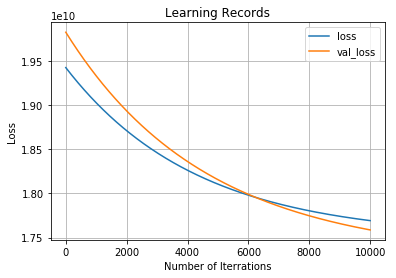

In [8]:
slr.plot_learning_record()

## [Task 3] Remove Terms of Biases

## [Task 4] Make Features Multi-dimentional

## [Task 5] Introduce an Equation for Updates

## [Task6] A Problem about Local Optimization

## [Task 7] What We Can Learn from Implementations from Scratch

    - We are not able to understand how algorithms of scikit-learn works without implementing those from scratch.
    
    - People who tried implementing scikit-learn from scratch are able to fulfill theirown responsibility for explaining why results they got are meaningful.
    
    - Also, We just can learn about high-quality programming. In this case, I definitely grasped structures of class.